In [2]:
from helpers import *

In [3]:
df = pd.read_csv("rfm_and_delay_undersample.csv")
print(df.shape)
df.head()

(5994, 6)


,recency_score,frequency_score,monetary_score,rfm_score,avg_satisfaction,avg_delivery_delay
0,1,1,2,112,4.0,1.0
1,3,1,2,312,5.0,10.0
2,4,1,5,415,2.0,27.0
3,5,1,3,513,5.0,5.0
4,4,1,2,412,5.0,20.0


In [4]:
df = normalize_dataframe(df)

## TSNE PCA

Projecting 2-dimensional data to 2D


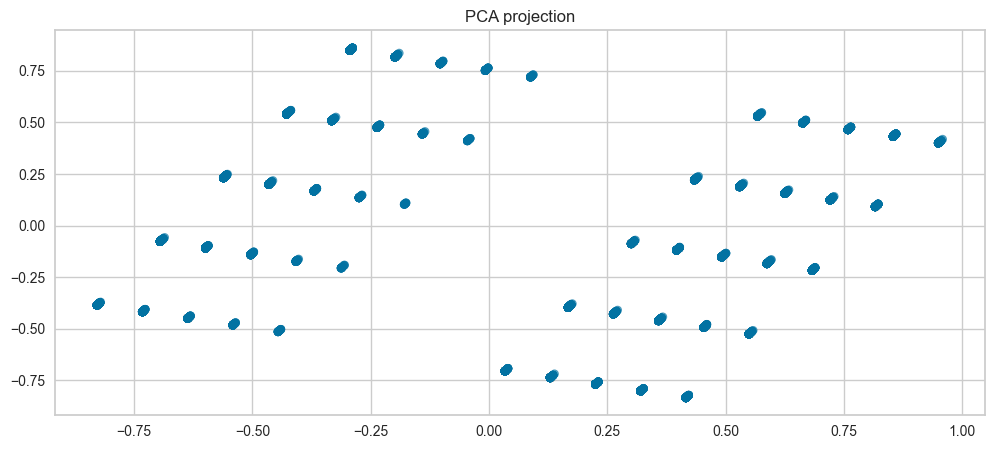

In [5]:
pca = PCA(n_components=2)
X = df
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X_reduced.shape[1])

plt.figure(figsize=(12,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            edgecolor='none', alpha=0.7, s=40)
plt.title('PCA projection')
plt.show()

In [6]:
df

,recency_score,frequency_score,monetary_score,rfm_score,avg_satisfaction,avg_delivery_delay
0,0.00,0.0,0.25,0.002252,0.833333,0.010256
1,0.50,0.0,0.25,0.452703,1.000000,0.056410
2,0.75,0.0,1.00,0.684685,0.500000,0.143590
3,1.00,0.0,0.50,0.905405,1.000000,0.030769
4,0.75,0.0,0.25,0.677928,1.000000,0.107692
...,...,...,...,...,...,...
5989,1.00,1.0,0.50,0.995495,0.666667,0.000000
5990,0.00,1.0,0.25,0.092342,0.666667,0.064103
5991,0.25,1.0,1.00,0.324324,0.750000,0.189744
5992,0.25,1.0,0.50,0.319820,0.888889,0.090598


In [7]:
tsne = TSNE(random_state=42)
X_tsne_pca = tsne.fit_transform(X_reduced)

Text(0.5, 1.0, 'TSNE with PCA')

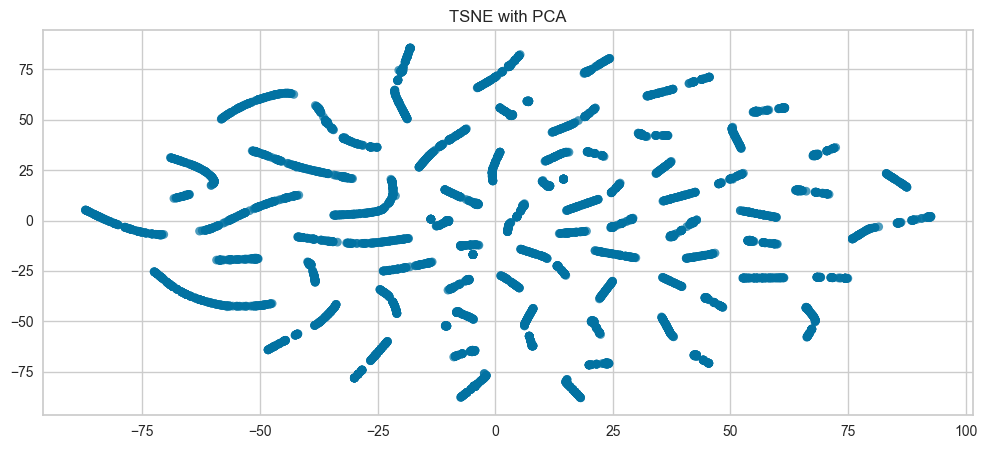

In [8]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE with PCA')

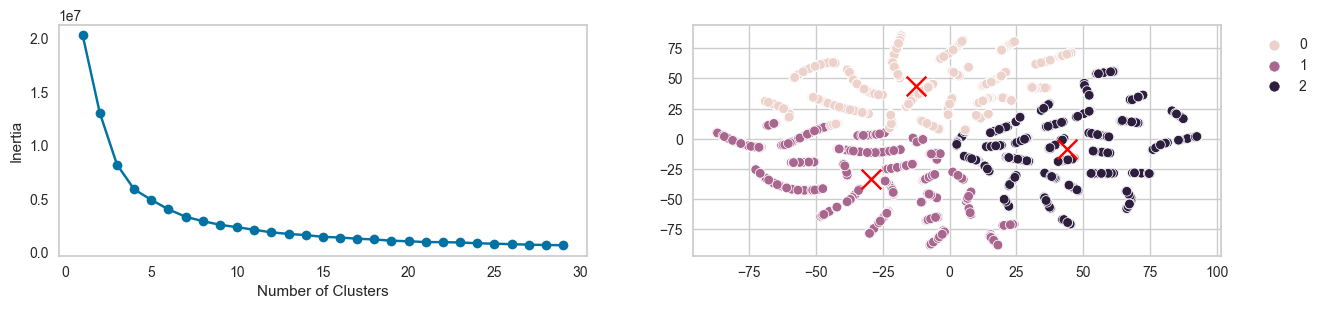

<Figure size 1000x300 with 0 Axes>

In [17]:
show_segmentation(X_tsne_pca, 3)

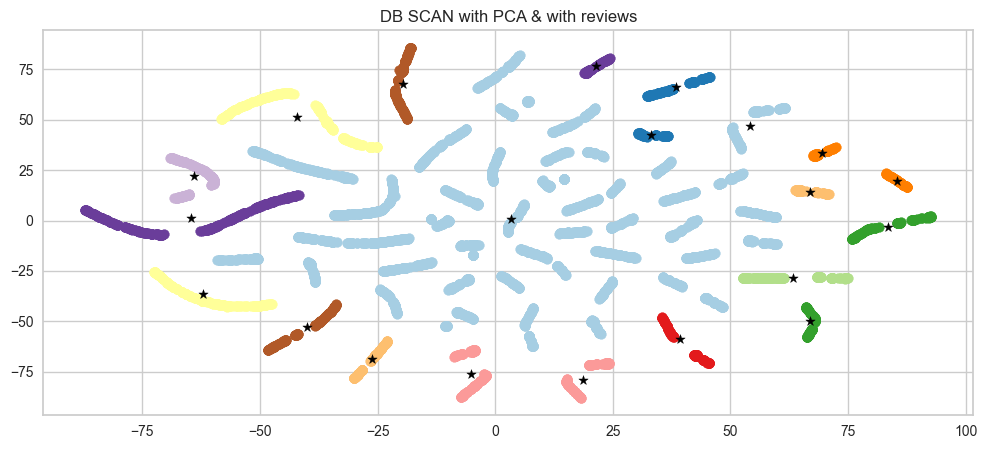

n_clusters 21


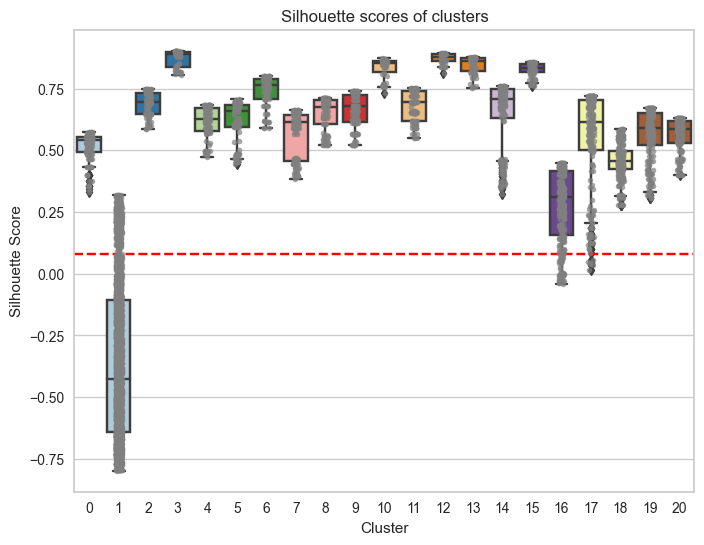

In [10]:
do_dbscan(X_tsne_pca, "DB SCAN with PCA & with reviews", eps=11.5)

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


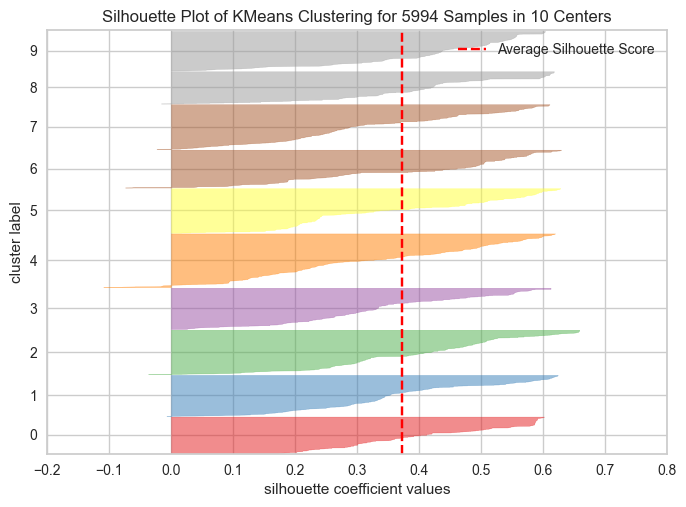

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5994 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
# Instantiate the clustering model and visualizer 
model = KMeans(10)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_tsne_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

#### PCA Explainability (without review)

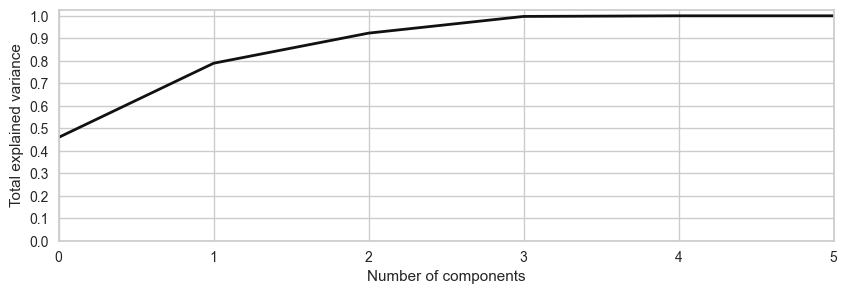

In [12]:
pca = PCA().fit(df)

plt.figure(figsize=(10,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 5)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [13]:
# perform PCA on the data  
pca = PCA(n_components=1)  
pca.fit(df)  
  
# get the loadings for the first principal component  
loadings = pca.components_[0]  
  
# create a dataframe to display the loadings  
loadings_df = pd.DataFrame({'Feature': df.columns, 'Loading': loadings})  
loadings_df = loadings_df.sort_values('Loading', ascending=False)  
  
print(loadings_df)  

              Feature   Loading
5  avg_delivery_delay  0.002454
4    avg_satisfaction -0.008791
0       recency_score -0.255413
3           rfm_score -0.308652
2      monetary_score -0.379362
1     frequency_score -0.833966


In [14]:
explained_variance = pca.explained_variance_ratio_[0] # explained variance of the first principal component  
feature_contrib = loadings_df['Loading'].apply(lambda x: x**2)  
loadings_df["Contribution"] = round(feature_contrib / feature_contrib.sum() * explained_variance,5) 

In [15]:
loadings_df

,Feature,Loading,Contribution
5,avg_delivery_delay,0.002454,0.00000
4,avg_satisfaction,-0.008791,0.00004
0,recency_score,-0.255413,0.02997
3,rfm_score,-0.308652,0.04377
2,monetary_score,-0.379362,0.06612
1,frequency_score,-0.833966,0.31952


/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

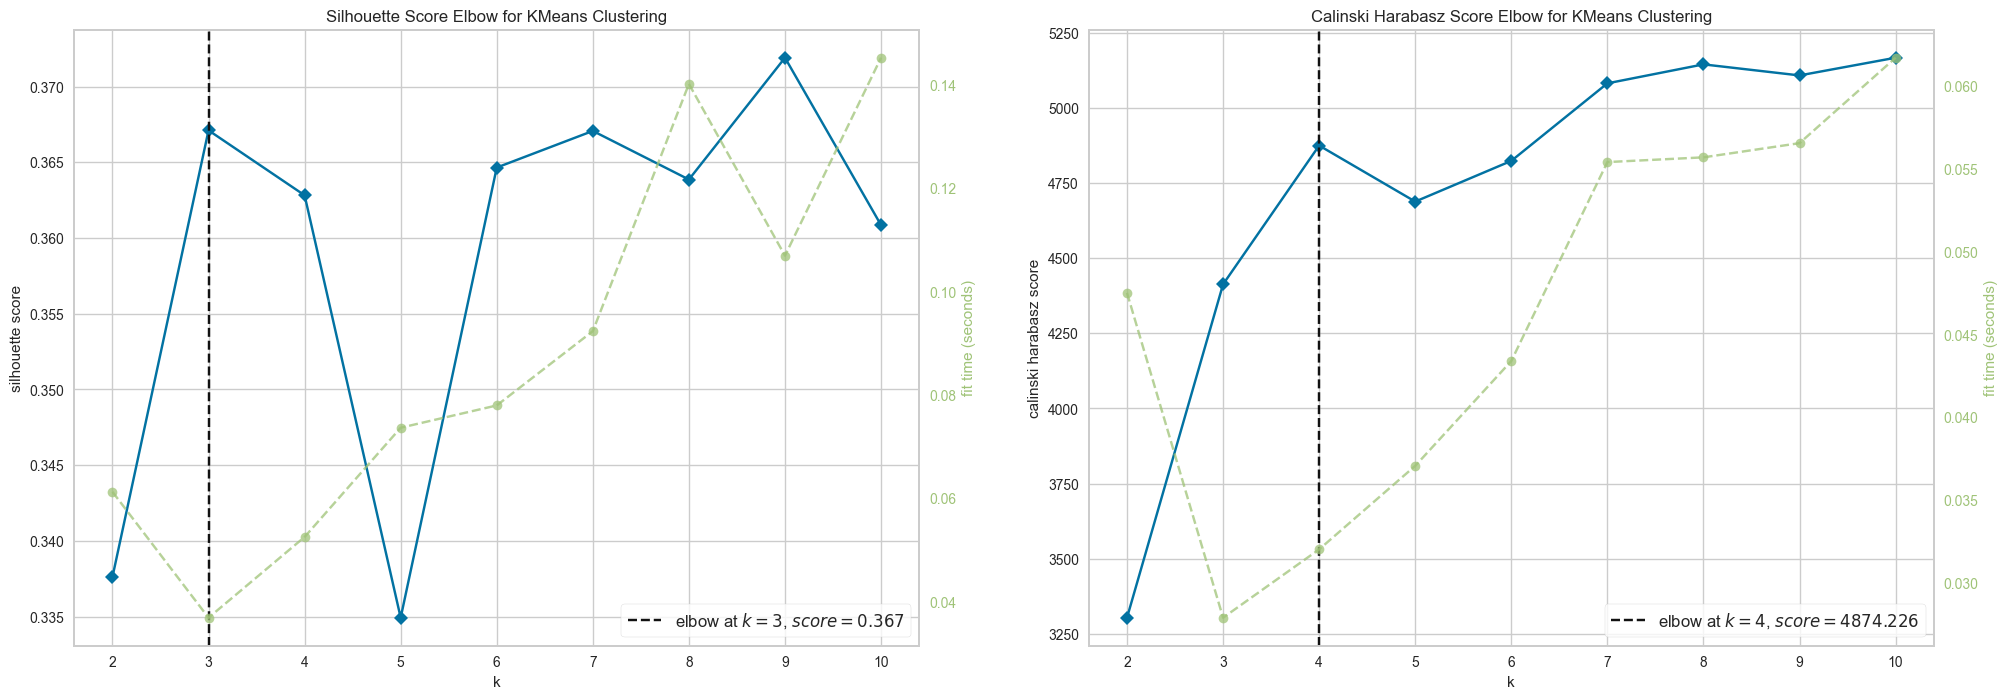

In [16]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.pipeline import Pipeline, make_pipeline

# Elbow method with differents metrics
metrics = ["silhouette", "calinski_harabasz"]
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(24,8))
for m in metrics:
    kmeans_visualizer = Pipeline([
        ("kelbowvisualizer", KElbowVisualizer(KMeans(),
                                              K=(4,10),
                                              metric=m,
                                              ax=axes[i]))])
    kmeans_visualizer.fit(X_tsne_pca)
    kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
    i+=1

plt.show()